In [1]:
!pip install matplotlib
!pip install pandas

In [2]:
import pandas
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pandas.read_csv('table.csv', index_col='Unnamed: 0')
df.head()

Score    Action
0   0.00  operator
1  19.55     reask
2  24.34     reask
3  29.26     reask
4   0.00  operator

In [4]:
df.groupby('Action').count()

Score
Action         
correct      35
operator    187
reask       145

In [5]:
scores = np.unique(df['Score'])[::-1]

In [6]:
scores

array([100.  ,  99.  ,  90.  ,  88.94,  88.54,  88.07,  83.62,  83.34,
        82.98,  82.95,  82.08,  81.88,  81.56,  81.46,  81.31,  81.08,
        80.84,  80.63,  80.35,  80.26,  80.06,  79.93,  79.23,  79.  ,
        78.99,  78.98,  78.74,  77.64,  77.39,  77.24,  77.23,  77.08,
        77.05,  77.02,  76.34,  76.3 ,  72.53,  70.15,  67.  ,  66.64,
        66.45,  66.22,  66.13,  64.19,  63.49,  63.32,  62.73,  62.72,
        62.16,  61.93,  59.89,  58.74,  58.45,  58.21,  58.11,  57.8 ,
        54.8 ,  54.72,  53.95,  53.73,  53.45,  53.15,  52.95,  52.23,
        52.04,  51.73,  51.56,  50.79,  50.74,  50.33,  50.3 ,  50.08,
        50.02,  49.86,  49.33,  49.28,  49.19,  48.89,  48.61,  48.54,
        48.03,  47.82,  46.39,  46.38,  45.98,  45.56,  45.5 ,  45.23,
        45.16,  44.98,  44.25,  44.09,  43.11,  42.91,  42.9 ,  42.71,
        42.56,  42.36,  42.21,  41.45,  41.37,  41.29,  41.07,  40.76,
        40.45,  40.24,  39.53,  39.35,  39.02,  38.75,  38.37,  38.19,
      

In [7]:
len_df = len(df)
print(len_df)
list_ratio_thr = list()
list_ratio_corr_not_corr = list()
for thr in scores:
    df_thr = df[df['Score'] >= thr]
    len_df_thr = len(df_thr)
    if not len_df_thr:
        continue
    df_counts = df_thr.groupby('Action').count()
    proportion_not_correct = (df_counts.loc['reask']['Score'] + df_counts.loc['operator']['Score']) / len_df_thr
    proportion_correct = df_counts.loc['correct']['Score'] / len_df_thr
    list_ratio_corr_not_corr.append(float(proportion_correct / proportion_not_correct))
    list_ratio_thr.append(len(df_thr) / len_df)

367


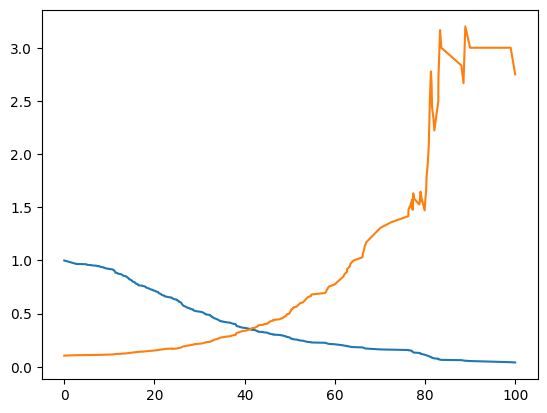

In [8]:
plt.plot(scores, list_ratio_thr)
plt.plot(scores, list_ratio_corr_not_corr)
plt.show()

In [9]:
i = np.array(list_ratio_corr_not_corr).argmax()
thr_1 = scores[7]
thr_1

83.34

In [18]:
scores_2 = scores[9:]

In [19]:
len_df = len(df)
list_ratio_reask_thr = list()
list_ratio_operator_thr = list()
list_ratio_reask_operator = list()


for thr in scores_2:
    df_reask_thr = df[(thr_1 > df['Score']) & (df['Score'] >= thr)]
    len_df_thr_reask = len(df_reask_thr)
    if not len_df_thr_reask:
        continue
    df_counts = df_reask_thr.groupby('Action').count()
    list_ratio_reask_thr.append(len(df_reask_thr) / len_df)
    list_ratio_reask_operator.append(float(df_counts.loc['reask']['Score']  / 
                                           (df_counts.loc['operator']['Score'] + df_counts.loc['correct']['Score'])))

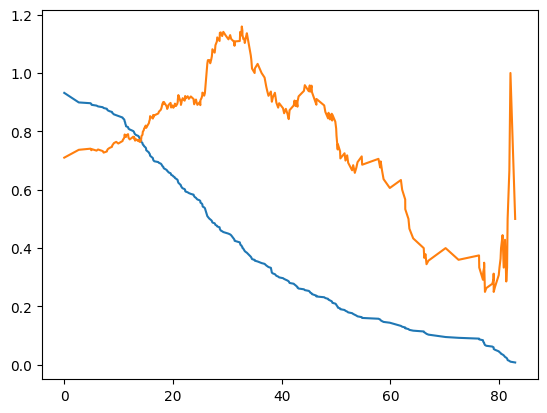

In [20]:
plt.plot(scores_2, list_ratio_reask_thr)
# plt.plot(scores_2, list_ratio_operator_thr)
# plt.plot(scores, list_prop_corr)
# plt.plot(scores, list_prop_not_corr)
plt.plot(scores_2, list_ratio_reask_operator)
plt.show()

In [21]:
thr_2 = scores_2[np.argmax(list_ratio_reask_operator)]
thr_2

32.66

In [22]:
def run(score: float):
    if score >= 83.34:
        return 'correct'
    elif score >= 32.66:
        return 'reask'
    else:
        return 'operator'

In [15]:
list_ratio_reask_operator[:10], scores_2[:10]

([0.5,
  1.0,
  0.6666666666666666,
  0.5,
  0.3333333333333333,
  0.2857142857142857,
  0.42857142857142855,
  0.3333333333333333,
  0.4444444444444444,
  0.4],
 array([82.95, 82.08, 81.88, 81.56, 81.46, 81.31, 81.08, 80.84, 80.63,
        80.35]))